In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,accuracy_score

In [3]:
cab_price_ds=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/25DaysInMachineLearning/master/18%20-%20Day%20-%2018%20-%20Linear%20Regression%20Practise%20Python/Practise/Predict%20Cab%20price.csv')

In [4]:
cab_price_ds.head()

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80


In [67]:
cab_price_ds.shape

(60, 5)

In [5]:
cab_price_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   miles   60 non-null     int64
 1   temp    60 non-null     int64
 2   rain    60 non-null     int64
 3   ncabs   60 non-null     int64
 4   price   60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


In [6]:
cab_price_ds.duplicated().sum()

0

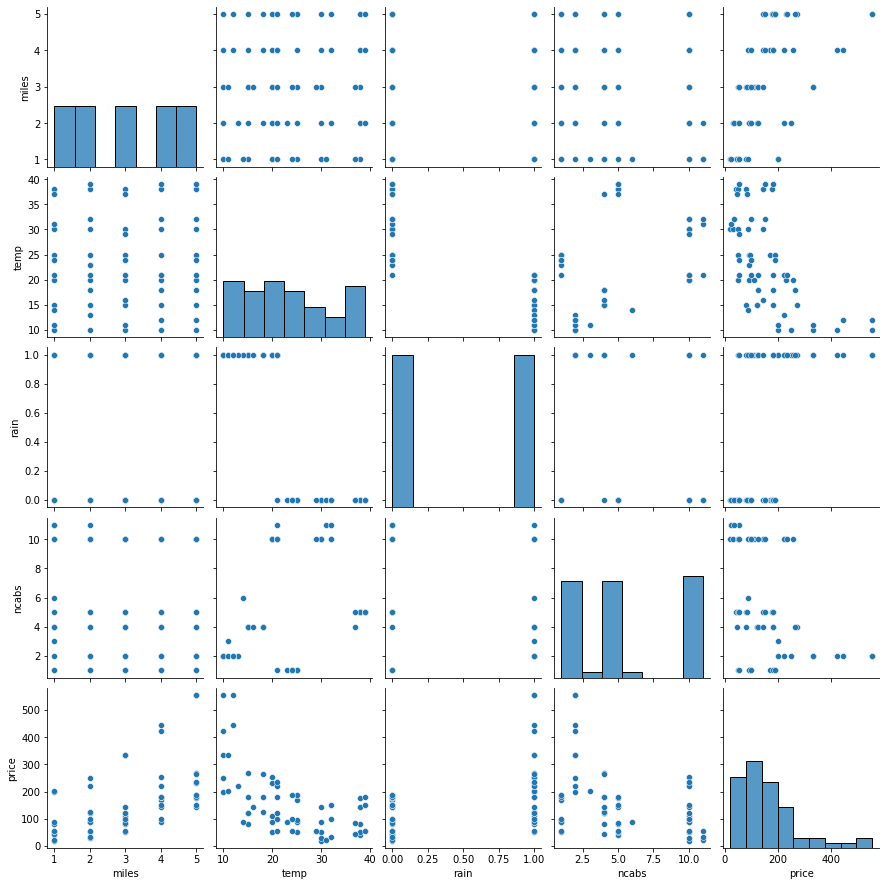

In [7]:
sns.pairplot(cab_price_ds)

In [71]:
cab_price_ds.temp.value_counts()

21    6
30    5
25    5
20    5
15    5
10    5
38    5
32    3
18    3
39    3
24    3
12    2
11    2
37    2
23    1
31    1
13    1
29    1
16    1
14    1
Name: temp, dtype: int64

In [126]:
cab_price_ds.rain.value_counts()

0    30
1    30
Name: rain, dtype: int64

In [127]:
cab_price_ds.ncabs.value_counts()

10    17
1     10
4     10
5      9
2      9
11     3
6      1
3      1
Name: ncabs, dtype: int64

In [73]:
cab_price_ds

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80
5,1,10,1,2,200
6,2,30,0,10,30
7,2,38,0,5,50
8,2,25,0,1,90
9,2,20,1,10,90


In [128]:
cab_price_pp = pd.get_dummies(cab_price_ds,columns=['temp','ncabs'])

In [129]:
x=cab_price_pp.drop(columns=['price'])

In [130]:
y=cab_price_pp.price    #,'ncabs','temp'

In [95]:
#x=cab_price_ds.drop(columns=['price'])

In [96]:
#y=cab_price_ds.price

In [131]:
x.head()

,miles,rain,temp_10,temp_11,temp_12,temp_13,temp_14,temp_15,temp_16,temp_18,...,temp_38,temp_39,ncabs_1,ncabs_2,ncabs_3,ncabs_4,ncabs_5,ncabs_6,ncabs_10,ncabs_11
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
y.head()

0    20
1    40
2    50
3    50
4    80
Name: price, dtype: int64

In [147]:
#train_x,test_x,train_y,test_x = train_test_split(x,y,test_size=.2,random_state=2)

In [148]:
#model = LinearRegression()
#model.fit(train_x,train_y)

LinearRegression()

In [133]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [136]:
model.coef_

array([ 46.692     ,  52.90997129,  50.42848687,  31.02848687,
       127.49048687, -33.27951313,  -6.72276969, -32.35862408,
       -43.75862408, -28.21995741,   4.32338496,   0.98647587,
         4.37047587, -17.65485747, -13.32152413, -36.16664375,
       -23.96664375,  12.53281079, -31.52282557,   3.53534721,
        16.53534721,  15.74068054,  -9.59804396, 107.14197374,
        68.52597374,  -8.0709153 , -60.4549153 ,  -6.72276969,
       -51.75292434, -39.06837889])

In [137]:
model.intercept_

1.8435680947386004

In [138]:
y_pred = model.predict(x)

In [139]:
mse = mean_squared_error(y, y_pred)

In [140]:
mse

686.2365272727274

In [141]:
rmse = np.sqrt(mean_squared_error(y, y_pred))

In [142]:
rmse

26.19611664489085

In [143]:
r2_score = model.score(x,y)

In [144]:
r2_score

0.9514428365184748